# SKLearn 16 - Classification Task dengan Random Forest

## General Machine Learning Model Training
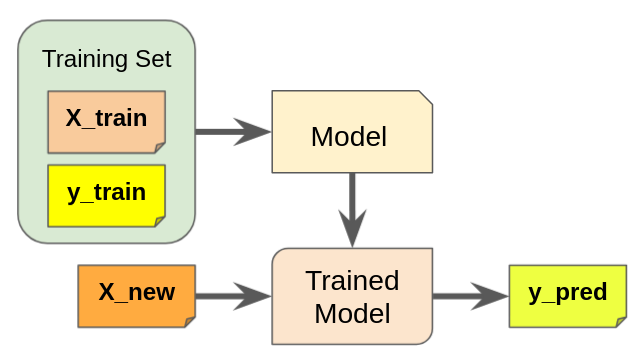

- Dalam melakukan model training, pada umumnya kita perlu menyiapkan training set yang kemudian akan dilakukan training oleh suatu model dan kemudian menghasilkan trained model.
- Trained model yang dihasilkan akan digunakan untuk memprediksi target dari feature.

## Ensemble Learning: Heterogeneous & Homogeneous
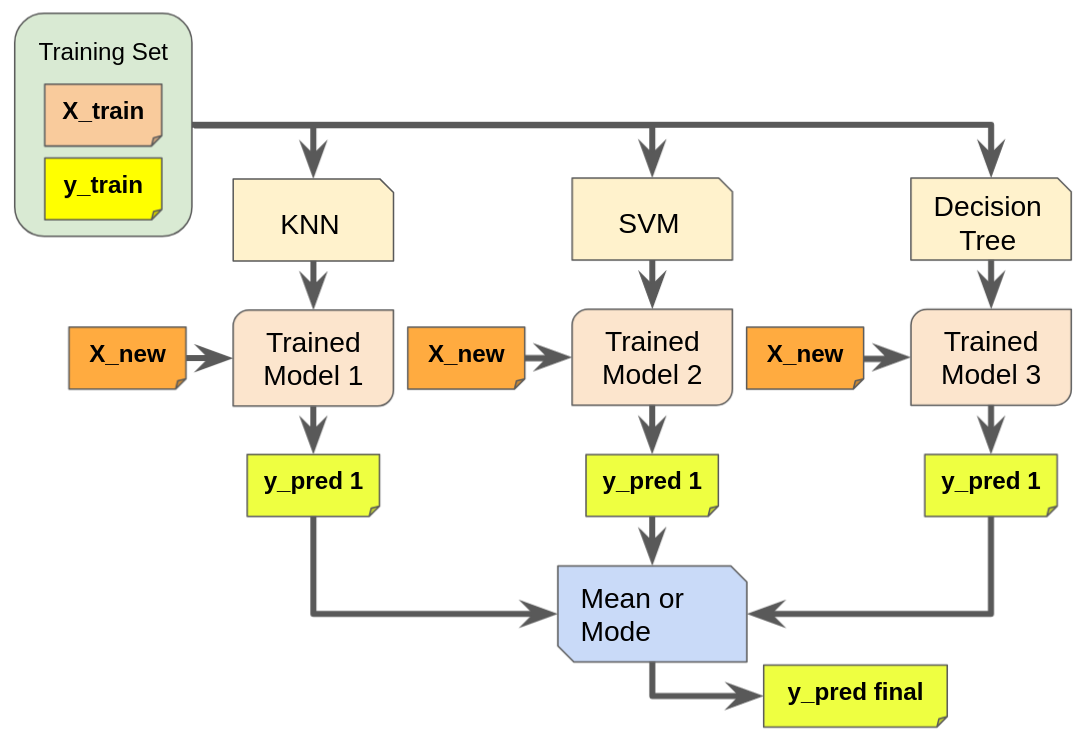

- `Ensemble learning` adalah suatu teknik yang digunakan untuk menggabungkan beberapa model dalam melakukan prediksi.
- `Heterogeneous` adalah ensemble learning yang memadukan sejumlah model dengan jenis yang beragam.
- `Homogeneous` adalah ensemble learning yang memadukan sejumlah model yang sejenis.
- Training set yang ada akan digunakan untuk melakukan training menggunakan beberapa model, pada contoh di atas model yang digunakan adalah KNN, SVM, dan Decision Tree.
- Setiap model yang dihasilkan digunakan untuk memprediksi target dari X_new.
    - y_pred 1 : hasil prediksi trained model 1 terhadap X_new.
    - y_pred 2 : hasil prediksi trained model 2 terhadap X_new.
    - y_pred 3 : hasil prediksi trained model 3 terhadap X_new.
- Terdapat lebih dari 1 prediksi, maka perlu disatukan dengan mekanisme `majority voting` untuk menghasilkan `y_pred final`.
    - Pada `regression task`, majority voting dilakukan dengan menggunakan `mean` / nilai rata-rata.
    - Pada `classification task`, majority voting dilakukan dengan menggunakan `mode` / kemunculan terbanyak.

## Bagging: Bootstrap Aggregating
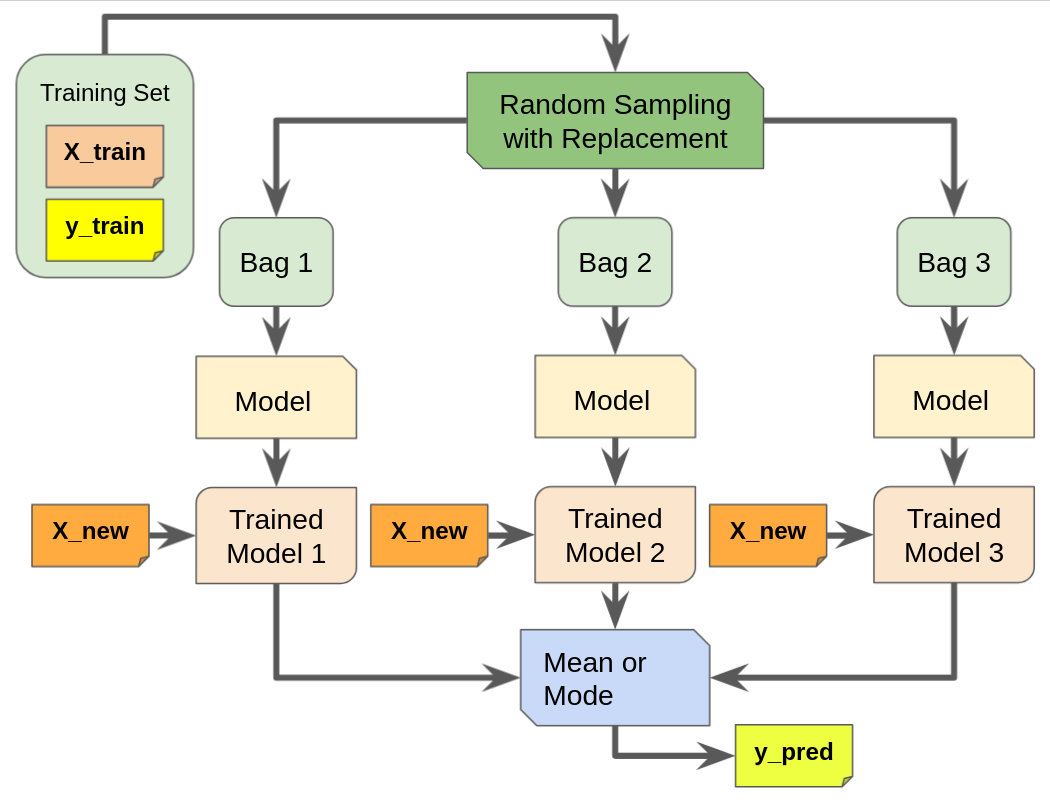

- Bagging merupakan implementasi dari homogeneous yang memadukan model yang sejenis. 
- Karena model yang digunakan sejenis, dibuat beberapa bag yang berisikan data yang berbeda yang dihasilkan melalui random sampling with replacement dari training set.

## Random Forest
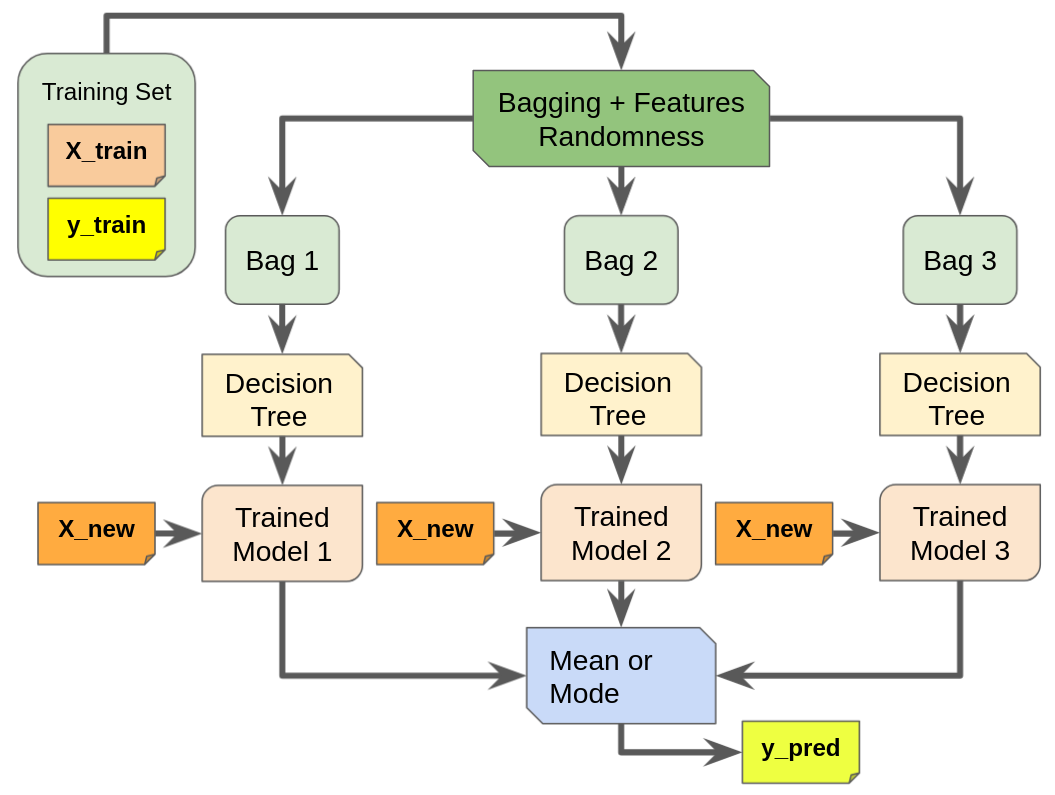

- Random Forest merupakan implementasi homogeneous ensemble yang meggunakan bagging dan feature randomness dimana model yang digunakan adalah decision tree.
- Performa dari random forest lebih superior dbandingkan dengan decision tree karena setiap tree ditraining menggunakan subset keseluruhan training yang tersedia.

## Dataset

- Dataset yang akan digunakan adalah Iris Dataset yang berisikan data terkait bunga iris yang terdiri dari 3 spesies, yaitu `Iris Setosa`, `Iris Virginica`, dan `Iris Versicolor`.
- Dataset tersebut akan displit menjadi 2 bagian yaitu nilai feature yang akan ditampung oleh variabel X dan target labelnya yang akan ditampung oleh variabel y.

In [1]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)

print(f'Dimensi Feature: {X.shape}')
print(f'Class: {set(y)}')

Dimensi Feature: (150, 4)
Class: {0, 1, 2}


In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=0)

## Classification dengan `RandomForestClassifier`
- Parameter `n_setimators=100` merepresentasikan berapa banyak decision tree yang akan ditraining.

In [3]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, 
                               random_state=0)

model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

## Evaluasi Model

In [4]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

